In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

### 1.1 使用决策树,分类鸢尾花

In [121]:
data=pd.read_csv('8.Regression/iris.data',header=None)
X=data.iloc[:,:2]
X=np.array(X)
Y=data.iloc[:,4]
Y=pd.Categorical(Y).codes
trainX,testX,trainY,testY=train_test_split(X,Y,train_size=0.8,shuffle=True,random_state=0)
print('Train X %d'%(len(trainX)))
print('Train Y %d'%(len(trainY)))
print('Test  X %d'%(len(testX)))
print('Test  Y %d'%(len(testY)))

Train X 120
Train Y 120
Test  X 30
Test  Y 30


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [123]:
# model=DecisionTreeClassifier(criterion='entropy',max_depth=2)
model=RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=2)
model.fit(trainX,trainY)
y_test_hat=model.predict(testX)
print('accuracy of train is %f'%(model.score(trainX,trainY)))
print('accuracy of test  is %f'%(model.score(testX,testY)))
# tree.export_graphviz(model,out_file='graph.dot')

accuracy of train is 0.816667
accuracy of test  is 0.633333


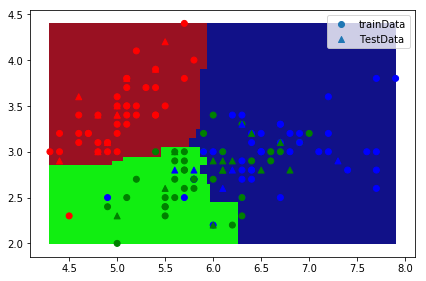

In [124]:
def showGraph(model,trainX,testX,trainY,testY):
    '''
        X,trainX,test must have shape (m,2)
        trainY,testY have shape (m,)
    '''
    M,N=100,200
    xx=np.concatenate((trainX,testX),axis=0)
    xmin,xmax=np.min(xx,axis=0),np.max(xx,axis=0)
    Xgrid,Ygrid=np.mgrid[xmin[0]:xmax[0]:M*1j,xmin[1]:xmax[1]:N*1j]
    x_show=np.stack((Xgrid.ravel(),Ygrid.ravel()),axis=1)
    y_show=model.predict(x_show)
    
    lights=mpl.colors.ListedColormap(['#991122','#11EE11','#111188'])
    darks = mpl.colors.ListedColormap(['r', 'g', 'b'])

    plt.figure(facecolor='w')
    plt.pcolormesh(Xgrid,Ygrid,y_show.reshape(Xgrid.shape),cmap=lights)
    plt.scatter(trainX[:,0],trainX[:,1],c=trainY,marker='o',label='trainData',cmap=darks)
    plt.scatter(testX[:,0],testX[:,1],c=testY,marker='^',label='TestData',cmap=darks)
    plt.tight_layout()
    plt.legend()
showGraph(model,trainX,testX,trainY,testY)

<img src='graph.png' />

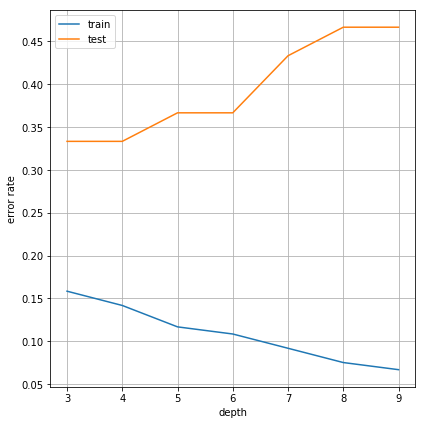

In [126]:
#a demo show how overfit occur
depths=list(range(3,10))
history_train=[]
history_test=[]
for d in depths:
#     model=DecisionTreeClassifier(criterion='entropy',max_depth=d)
    model=RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=d)
    model.fit(trainX,trainY)
    history_train.append(1-model.score(trainX,trainY))
    history_test.append(1-model.score(testX,testY))

plt.figure(facecolor='w',figsize=(6,6))
plt.plot(depths,history_train,label='train')
plt.plot(depths,history_test,label='test')
plt.xlabel('depth')
plt.ylabel('error rate')
plt.legend()
plt.grid()
plt.tight_layout()

##  1.2 using different feature combation with DecisionTree,compare result:

In [128]:
data=pd.read_csv('8.Regression/iris.data',header=None)
X=data.iloc[:,:4]
X=np.array(X)
Y=data.iloc[:,4]
Y=pd.Categorical(Y).codes
trainX,testX,trainY,testY=train_test_split(X,Y,train_size=0.8,shuffle=True,random_state=0)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


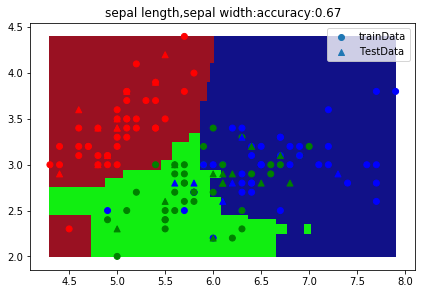

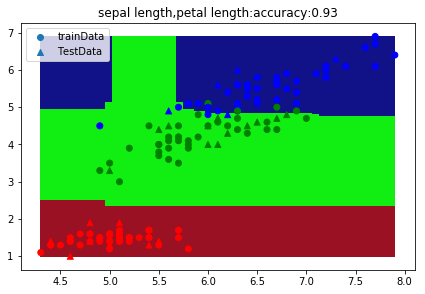

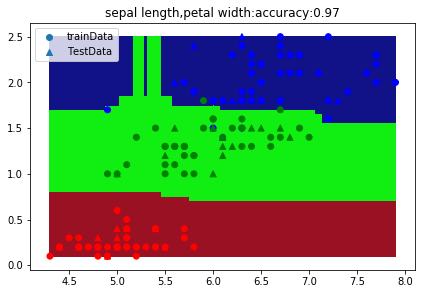

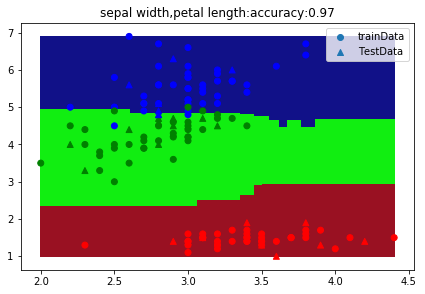

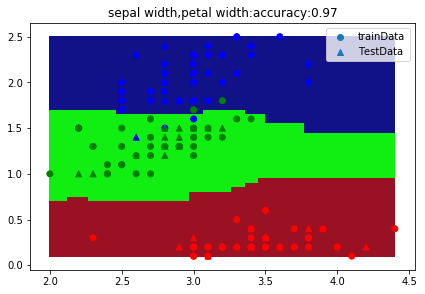

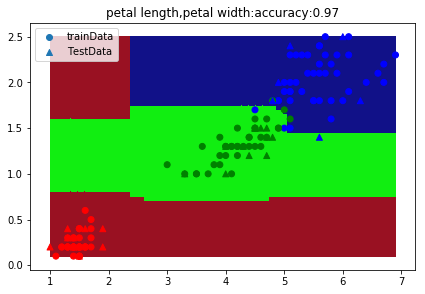

In [130]:
depth=3
feature_name=['sepal length','sepal width','petal length','petal width']
for i in range(4):
    for j in range(i+1,4):
#         model2=DecisionTreeClassifier(criterion='entropy',max_depth=depth)
        model2=RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=depth)
        _x=trainX[:,[i,j]]
        
        model2.fit(_x,trainY)
        showGraph(model2,_x,testX[:,[i,j]],trainY,testY)
        plt.title('%s,%s:accuracy:%.2f'%(feature_name[i],feature_name[j],model2.score(testX[:,[i,j]],testY  )))

### 1.3Decision Tree for regression problem 

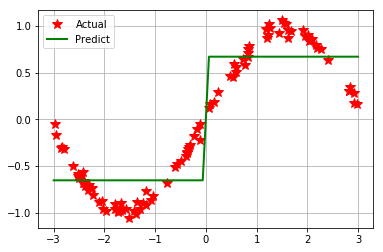

In [104]:
N = 100
x = np.random.rand(N) * 6 - 3     # [-3,3)
x.sort()
y = np.sin(x) + np.random.randn(N) * 0.05
# print(y)
x = x.reshape(-1, 1)  # 转置后，得到N个样本，每个样本都是1维的
# print(x)

dt = DecisionTreeRegressor(criterion='mse', max_depth=1)
dt.fit(x, y)
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
y_hat = dt.predict(x_test)
plt.plot(x, y, 'r*', ms=10, label='Actual')
plt.plot(x_test, y_hat, 'g-', linewidth=2, label='Predict')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [52]:
tree.export_graphviz(dt,out_file='graphRegress.dot')

In [53]:
! dot -Tpng graphRegress.dot -o graphRegress.png

In [58]:
#I'm not sure with regress tree,in another I not know how to choice x<t
def mse(y,yhat):return np.average((y-yhat)**2)
def leaf(y):return (np.average(y),mse(y,np.average(y)))
L0=leaf(y)
print('output of 0 level is %.4f,mse:%.4f,samples is %d'%(L0[0],L0[1],len(y)))
#after split 
mask=x.ravel()<=0.122
yleft,yright=y[mask],y[~mask]
L1_left=leaf(yleft)
L2_right=leaf(yright)
print('output of 1 level is %.4f,mse:%.4f,samples is %d'%(L1_left[0],L1_left[1],len(yleft)))
print('output of 1 level is %.4f,mse:%.4f,samples is %d'%(L2_right[0],L2_right[1],len(yright)))
totalMSE=( len(yleft)*L1_left[1]+len(yright)*L2_right[1] )/(len(y))
print('total MSE afer x<t is %.4f'%totalMSE)
print('===================DT================================')
#using line search to choose t
NT=50
thresold=np.linspace(min(x),max(x),NT,endpoint=False)
t=x<=thresold

minMSE=1e10
chooseT=min(x)
for k in range(NT):
    mask=t[:,k]
    yleft,yright=y[mask],y[~mask]
    L1_left=leaf(yleft)
    L2_right=leaf(yright)
#     print('output of 1 level is %.4f,mse:%.4f,samples is %d'%(L1_left[0],L1_left[1],len(yleft)))
#     print('output of 1 level is %.4f,mse:%.4f,samples is %d'%(L2_right[0],L2_right[1],len(yright)))
    totalMSE=( len(yleft)*L1_left[1]+len(yright)*L2_right[1] )/(len(y))
    if totalMSE<=minMSE:
        minMSE=totalMSE
        chooseT=thresold[k]
print('total MSE afer x<%.f is %.4f'%(chooseT,minMSE))
print('==================================================')
    

output of 0 level is -0.1441,mse:0.5471,samples is 100
output of 1 level is -0.6809,mse:0.0849,samples is 62
output of 1 level is 0.7318,mse:0.0639,samples is 38
total MSE afer x<t is 0.0769
===================DT================================
total MSE afer x<0 is 0.0769


<img src='graphRegress.png?x=1' />

## 1.3Bagging 

In [173]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression,RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [168]:
def f(x):
    return 0.5*np.exp(-(x+3) **2) + np.exp(-x**2) + 0.5*np.exp(-(x-3) ** 2)
np.random.seed(0)
N = 200
x = np.random.rand(N) * 10 - 5  # [-5,5)
x = np.sort(x)
y = f(x) + 0.05*np.random.randn(N)
x.shape = -1, 1

rigid_model 0.4893080472785374
dTree 0.8874562518771993
bagging_rigid_model 0.4889112125861495
bagging_tr_model 0.9495540782367561


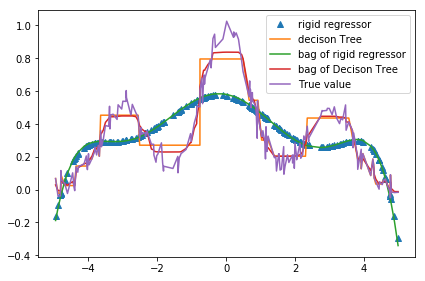

In [191]:
degreee=6
maxdepth=5
poly=PolynomialFeatures(degreee)

#rigid regressor
rigid_model=RidgeCV(alphas=np.logspace(-3, 2, 20),fit_intercept=False)
rigid_model=Pipeline([('poly',poly),('model',rigid_model)])
rigid_model.fit(x,y)
plt.plot(x,rigid_model.predict(x),'^',label='rigid regressor')
print('rigid_model',rigid_model.score(x,y))

#decison Tree
dTree=DecisionTreeRegressor(max_depth=maxdepth)
dTree.fit(x,y)
plt.plot(x,dTree.predict(x),label='decison Tree')
print('dTree',dTree.score(x,y))

#bag rigid model
baseModel=Pipeline([
        ('poly',poly),
        ('model',RidgeCV(alphas=np.logspace(-3,2,20),fit_intercept=False)
    )])
bagging_model=BaggingRegressor(baseModel,n_estimators=100)
bagging_model.fit(x,y)
plt.plot(x,bagging_model.predict(x),label='bag of rigid regressor')
print('bagging_rigid_model',bagging_model.score(x,y))

#bag decision Tree model
bagging_tr_model=BaggingRegressor(DecisionTreeRegressor(max_depth=maxdepth),n_estimators=100)
bagging_tr_model.fit(x,y)
plt.plot(x,bagging_tr_model.predict(x),label='bag of Decison Tree')
print('bagging_tr_model',bagging_tr_model.score(x,y))

################################################
plt.plot(x,y,label='True value')
plt.legend()
plt.tight_layout()

# 统计学方法 8.4节提升决策数,8.2例子

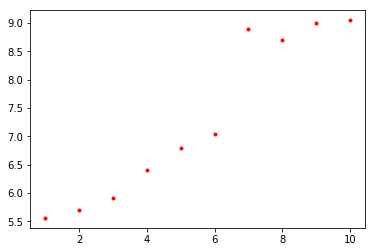

In [106]:
x=np.array([1,2,3,4,5,6,7,8,9,10])
y=np.array([5.56,5.70,5.91,6.4,6.8,7.05,8.9,8.7,9,9.05])
plt.figure()
plt.plot(x,y,'r.')

In [147]:
M=6
T=0
R=y-T #s
x.shape=(-1,1)
f=[[0] for m in range(M+1)] #f[0] is a constant function
Ts=[]
for m in range(1,M+1):
    T=DecisionTreeRegressor(max_depth=1)
    T.fit(x,R)
    R=R-T.predict(x)
    Ts.append(T)
    tree.export_graphviz(T,'baseFunction/T.%d.dot'%m)
    for j in range(m,M+1):
        f[j].append(T)
def predict(fi,x):
    yhat=0
    for i,T in enumerate(fi):
        if i!=0:
            yhat+=T.predict(x)
    return yhat

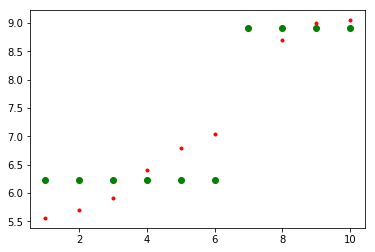

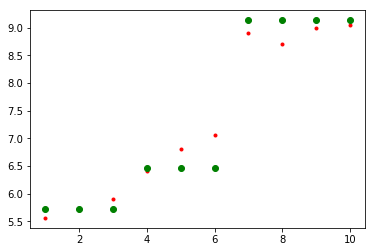

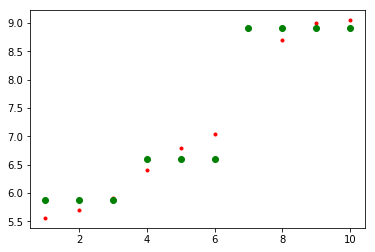

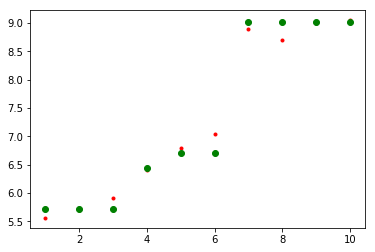

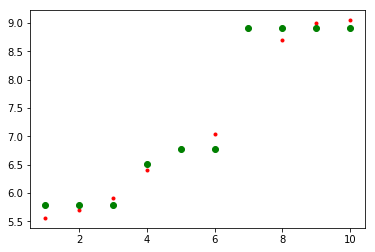

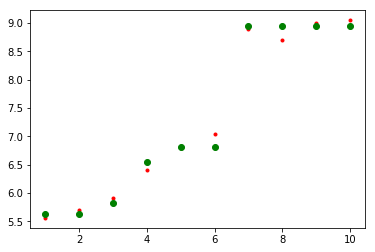

In [150]:
for m in range(1,M+1):
    plt.figure(facecolor='w')
    plt.plot(x,y,'r.',x,predict(f[m],x),'go')